# Main analysis

*Lovisa Franzén, lovisa.franzen@scilifelab.se*

Includes data processing, data visualisation, etc.

## Background

Budesonide, sold by AstraZeneca under the brand names Pulmicort and Symbicort, is a glucocorticoid used for long term management of asthma and chronic obstructive pulmonary disease (COPD). The compound can be administered through inhalation or as a pill, among other forms. It was sold for the first time as medication in 1981, and has since held a large part of the consumption market.

In a publication by Barrette et al. (2016)<sup>1</sup>, the authors studied the effect of budesonide treatment in primary human foetal lung explants. They prepared RNA from 3 samples of foetal lung at 23 weeks gestation before (preculture, PC) and after 4 days culture as explants with (Bud) or without (Way) budesonide (30 nM) and performed RNAseq on the 9 samples. The sequencing was performed using Illumina HiSeq 2500, and the processed data is publicly available at Gene Expression Omnibus (accession number <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE83888">GSE83888</a>).   

  
<br>
<span style="font-size:0.8em;">
[1] Anne Marie Barrette, Jessica K. Roberts, Cheryl Chapin, Edmund A. Egan, Mark R. Segal, Juan A. Oses-Prieto, Shreya Chand, Alma L. Burlingame, and Philip L. Ballard, "Antiinflammatory Effects of Budesonide in Human Fetal Lung", *American Journal of Respiratory Cell and Molecular Biology*, 2016, <a href="https://www.atsjournals.org/doi/10.1165/rcmb.2016-0068OC">link to article</a>
</span>

## Set-up

First I set everything up by importing the necessary modules, defining paths, and defining basic functions

In [48]:
import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
dir_project = os.path.realpath('..')
dir_data = os.path.join(dir_project, 'data')
dir_res = os.path.join(dir_project, 'results')

In [28]:
def grep(l, p):
    return [i for i in l if p in i]

## Read data

The data files are located in the `data/` folder. To limit the scope of this project, I've decided to exclusively focus on the 'Way' (without treatment) and 'Bud' (with budesonide treatment) groups.

In [31]:
data_files = os.listdir(dir_data)
data_files

['GSM2220787_PC_2.txt',
 'GSM2220786_PC_1.txt',
 'GSM2220784_Bud_2.txt',
 'GSM2220789_Way_1.txt',
 'GSM2220790_Way_2.txt',
 'GSM2220785_Bud_3.txt',
 'GSM2220788_PC_3.txt',
 'GSM2220791_Way_3.txt',
 'GSM2220783_Bud_1.txt']

In [39]:
exp_way_1 = pd.read_csv( os.path.join(dir_data, grep(data_files, 'Way')[0]) , sep = '\t')
exp_way_2 = pd.read_csv( os.path.join(dir_data, grep(data_files, 'Way')[1]) , sep = '\t')
exp_way_3 = pd.read_csv( os.path.join(dir_data, grep(data_files, 'Way')[2]) , sep = '\t')
exp_bud_1 = pd.read_csv( os.path.join(dir_data, grep(data_files, 'Bud')[0]) , sep = '\t')
exp_bud_2 = pd.read_csv( os.path.join(dir_data, grep(data_files, 'Bud')[1]) , sep = '\t')
exp_bud_3 = pd.read_csv( os.path.join(dir_data, grep(data_files, 'Bud')[2]) , sep = '\t')

In [45]:
exp_way = pd.merge(exp_way_1, exp_way_2, on='Gene').merge(exp_way_3, on='Gene')
exp_bud = pd.merge(exp_bud_1, exp_bud_2, on='Gene').merge(exp_bud_3, on='Gene')

In [46]:
exp_all = pd.merge(exp_way, exp_bud, on='Gene')
exp_all

,Gene,Way_1.cpm,Way_2.cpm,Way_3.cpm,Bud_2.cpm,Bud_3.cpm,Bud_1.cpm
0,ENSG00000000003,127.0126,98.2498,111.1196,77.1369,78.8440,79.1299
1,ENSG00000000005,0.0825,0.0462,0.0000,0.0761,0.0000,0.0000
2,ENSG00000000419,59.1461,56.0107,61.0911,62.1508,60.0492,52.3385
3,ENSG00000000457,14.9875,13.2633,9.9430,13.4647,12.4601,10.5766
4,ENSG00000000460,11.1736,11.6458,7.2557,9.3568,7.2247,7.6602
...,...,...,...,...,...,...,...
83904,ENSG00000269881,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
83905,ENSG00000269882,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
83906,ENSG00000269883,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
83907,ENSG00000269884,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


### Look at data

In [47]:
exp_all.describe()

,Way_1.cpm,Way_2.cpm,Way_3.cpm,Bud_2.cpm,Bud_3.cpm,Bud_1.cpm
count,83909.000000,83909.000000,83909.000000,83909.000000,83909.000000,83909.000000
mean,11.917672,11.917672,11.917674,11.917672,11.917675,11.917674
std,85.659276,81.590633,93.709144,93.142985,90.955367,110.890260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.144300,0.138600,0.134400,0.152100,0.104700,0.155500
max,5790.587500,5375.872000,9180.690300,9657.065500,8089.049500,15064.851700


As one can see here, the counts have been normalised through CPM (counts-per-million) conversion and each sample has the same average gene count.

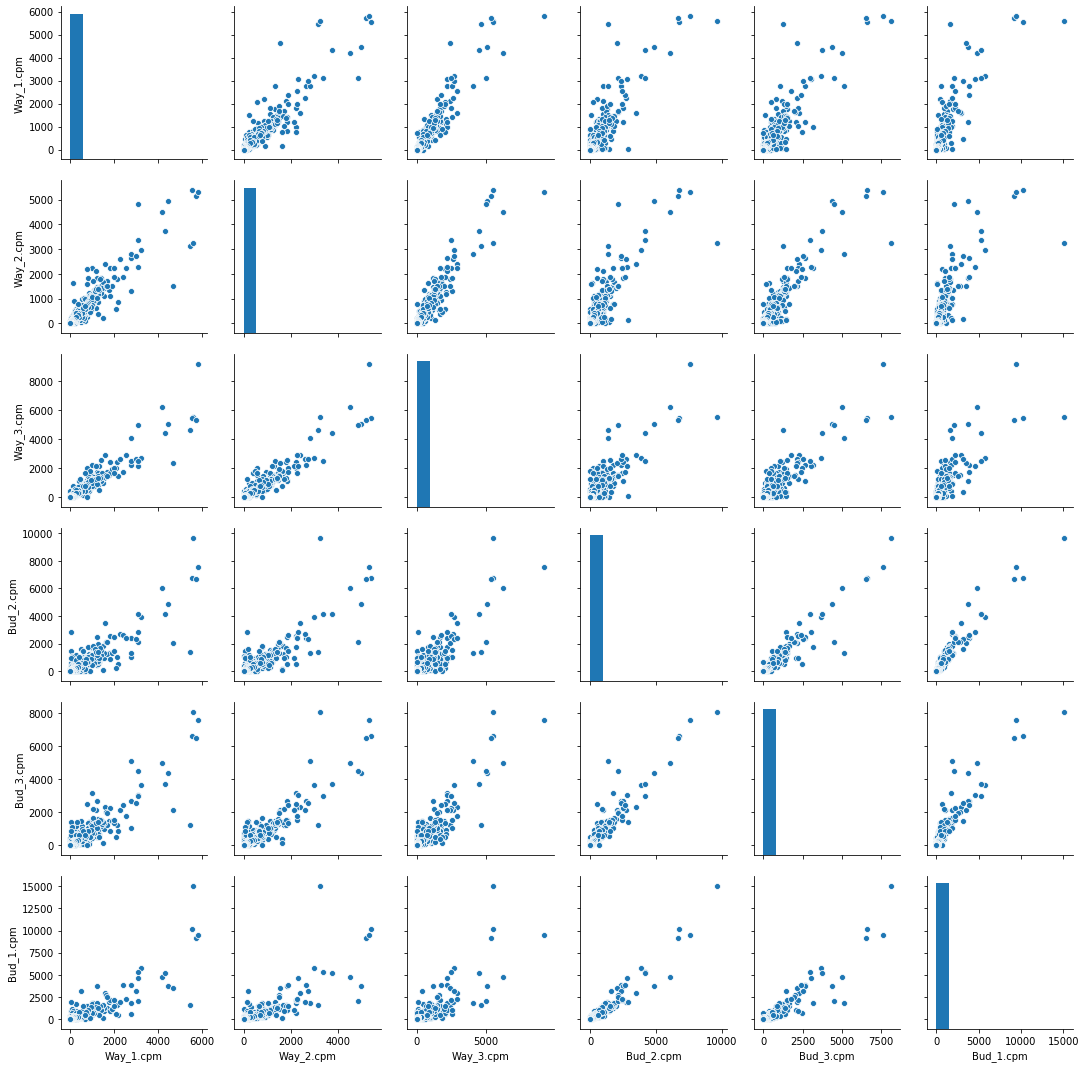

In [81]:
sns.pairplot(exp_all.iloc[:,1:])

The data is generally heavily skewed towards lower counts (positively skewed), as is expected for most RNA seq data. Clearer linear correlations in the expression can moreover be seen within each group, as compared to between groups.

## Differential gene expression analysis

In [ ]:
np.where(exp_all[col]>0, np.log10(exp_all[col]), 0)